# Statistical Distributions

![](images/distributions.png)

# Order of Business:
    
>    1. Describe the difference between discrete vs continuous variables
>    2. Discuss PMFs, PDFs, CDFs
>    3. Introduce the normal distribution and empirical rule

## What is a statistical distribution?

> After establishing the set of all possible outcomes, a statistical distribution is a representation of the relative frequency each event will occur.

Distributions will reappear throughout the bootcamp.  They will:

1. Allow us to conduct statistical tests to judge the validity of our conclusions.  As a data scientist at your company, you may be asked to perform various scientific tests. For example, you may be asked to judge whether a certain change to the user interface of your website increases conversion rate. 
2. Provide the foundation for specific assumptions of linear regression.
3. Appear in the cost functions tied to logistic regression and other models.
4. Drive the classification decisions made in parametric models, such as Naive-Bayes. 



# Discrete vs Continuous

We will learn about a variety of different probability distributions, but before we do so, we need to establish the difference between **discrete** and **continuous** variables.

## Discrete
>  Discrete distributions are qualified as "items that can be counted".  Take, for example, a roll of a single six-sided die. In practical terms, discrete data often has a finite amount of possibilities, though this rule does not always hold. 

![](images/uniform.png)

> - There are 6 possible outcomes of the roll.  In other words, 4.5 cannot be an outcome. As you see on the PMF plot, the bars which represent probability do not touch, suggesting non-integer numbers between 1 and 6 are not possible results.

### Let's think back to our Phase 1 projects: What are some examples of discrete probability distributions in the Movie datasets?

your answer here

Let's take a moment to look back at the Divy data we encountered in our visualizations lesson.



In [15]:
# ! mkdir data
# ! curl https://divvy-tripdata.s3.amazonaws.com/Divvy_Trips_2020_Q1.zip -o 'data/divy_2020_Q1.zip'
# ! unzip data/divy_2020_Q1.zip -d data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%load_ext autoreload
%autoreload 2
from src.data_import import prep_divy
from src.student_caller import three_random_students
from src.student_list import student_first_names
divy_trips = prep_divy()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Let's create a probability distribution of the rides per day of the week.

In [18]:
# code here

The above plot visualizes an **empirical** distribution. Empirical distributions are based on observations of real world phenomena. 

An **analytical** distribution is one which is created by a mathematical function.  We use analytical functions to model real world phenomena. 
[ThinkStats2e](http://greenteapress.com/thinkstats2/html/thinkstats2006.html)

#### Examples of analytical discrete distributions:

> 1. The Uniform Distribution:- occurs when all possible outcomes are equally likely.
> 2. The Bernoulli Distribution: - represents the probability of success for a certain experiment (binary outcome).
> 3. The Binomial Distribution - represents the probability of observing a specific number of successes (Bernoulli trials) in a specific number of trials.
> 4. The Poisson Distribution:- represents the probability of 𝑛 events in a given time period when the overall rate of occurrence is constant.



## Continuous

With a continous distribution, the set of possible results is an infinite set of values within a range. One way to think about continuous variables are variables that have been measured.  Measurement can always be more precise.

> - A common example is height.  Although we think of height often in values such as 5 feet 7 inches, the exact height of a person can be any value within the range of possible heights.  In other words, a person could be 5 foot 7.000001 inches tall. 
> - Another example is temperature, as shown below:

![](images/pdf.png)

#### Examples of analytical continuous distributions
> 1. Continuous uniform
> 2. The Normal or Gaussian distribution.
> 3. Exponential


### What are examples of continuous probability distributions in the movie datasets?

    # your answer here

In [19]:
# Let's take the data above, and inspect and plot a continuous variable: ride time.


In [20]:
# Boxplot

In [21]:
# Boxplot no fliers

In [22]:
# Histogram

The distinction between discrete and continuous is very important to have in your mind, and can easily be seen in plots. 

Let's do a quick exercise. There are two tasks.  

1. First, simply change the color of the plots representing discrete data to orange and the plots represent continuous data to blue.
2. Attach the titles to the distributions you think reflect the data set described.

In [23]:
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

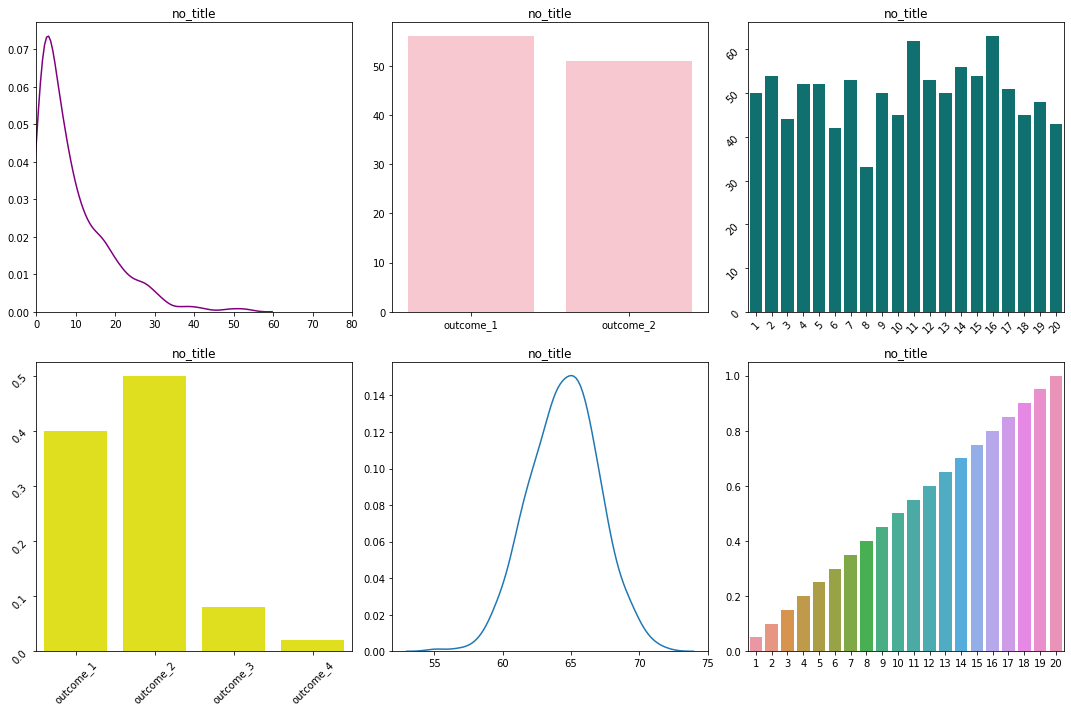

In [24]:

title_1 = "height_of_us_women in inches"
title_2 = 'outcomes of flipping a coin 100 times'
title_3 = 'outcomes of rolling a 20 sided die 1000 times'
title_4 = 'probability that a computer part lasts a certain amount of time from now.'
title_5 = 'probability that a picture is a chihauhua\n, a muffin, a bird, or a piece of pizza\n as would guess a neural network'
title_6 = 'probability of rolling a value equal to or below\n a certain number on a 20 sided dice'
no_title = 'no_title'

fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.kdeplot(np.random.exponential(10, size=1000), ax=ax[0][0], color='purple')
ax[0][0].set_xlim(0,80)
ax[0][0].set_title(no_title)

sns.barplot(['outcome_1', 'outcome_2', 'outcome_3', 'outcome_4'], [.4,.5,.08,.02], ax=ax[1][0], color='yellow')
ax[1][0].tick_params(labelrotation=45)
ax[1][0].set_title(no_title)

sns.kdeplot(np.random.normal(64.5, 2.5, 1000), ax=ax[1][1])
ax[1][1].set_title(no_title)

sns.barplot(x=['outcome_1','outcome_2'], y=[sum(np.random.binomial(1,.5, 100)),100 - sum(np.random.binomial(1,.5, 100))], ax=ax[0][1], color='pink')
ax[0][1].set_title(no_title)

sns.barplot(x=list(range(1,21)), y=np.unique(np.random.randint(1,21,1000), return_counts=True)[1], ax=ax[0][2], color='teal')
ax[0][2].tick_params(labelrotation=45)
ax[0][2].set_title(no_title)

sns.barplot(list(range(1,21)), np.cumsum([1/20 for number in range(1,21)]), ax=ax[1][2])
ax[1][2].set_title(no_title)

plt.tight_layout()

# PMFs, PDFs, and CDFs, oh my!

## PMF: Probability Mass Function


The $\bf{probability\ mass\ function\ (pmf)}$ for a random variable gives, at any value $k$, the probability that the random variable takes the value $k$. Suppose, for example, that I have a jar full of lottery balls containing:
- 50 "1"s,
- 25 "2"s,
- 15 "3"s,
- 10 "4"s

We then represent this function in a plot like so:

In [25]:
# For each number, we calculate the probability that pull it from the jar by dividing

numbers = range(1,5)
counts = [50,25, 15, 10]

In [9]:
# calculate the probs by dividing each count by the total number of balls.
probs = None
lotto_dict = {}

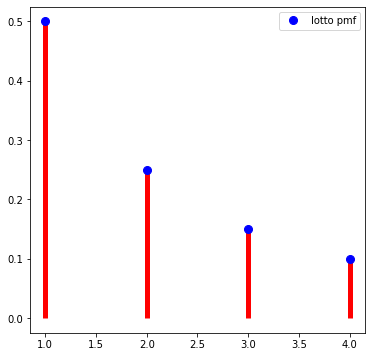

In [11]:
# Plot here!


x = list(lotto_dict.keys())
y = list(lotto_dict.values())

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y, 'bo', ms=8, label='lotto pmf')
ax.vlines(x, 0, y, 'r', lw=5)
ax.legend(loc='best');

## PDF: Probability Density Function
> Probability density functions are similar to PMFs, in that they describe the probability of a result within a range of values.  But where PMFs can be described with barplots, PDFs are smooth curves.  

![](images/pdf_temp.png)



We can think of a pdf as a bunch of bars of probabilities getting smaller and smaller until each neighbor is indistinguishable from its neighbor.


![](images/pdf_inter.png)

# Describing the PDF

How does mean and standard deviation affect the shape of our PDF.


The mean of our PDF affects where it is centered on the x-axis.  In numpy and stats, mean is denoted by the loc parameter.

The two plots below have the same shape, but different centers.

Text(0.5, 1.0, 'Two distributions differing only in mean')

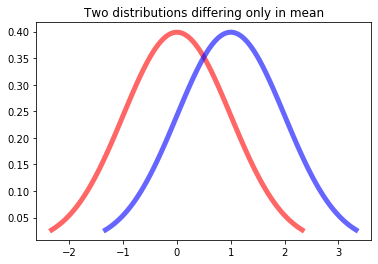

In [32]:
fig, ax = plt.subplots()

mean = 0
z_curve = np.linspace(stats.norm(mean,1).ppf(0.01),
             stats.norm(mean,1).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean,1).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
z_curve = np.linspace(stats.norm(mean,1).ppf(0.01),
             stats.norm(mean,1).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean,1).pdf(z_curve),
     'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions differing only in mean")

The standard deviations of our plots describes how closely the points are gathered around the mean.  Low variance means tight and skinny, high variance short and wide.

Text(0.5, 1.0, 'Two distributions with different variance')

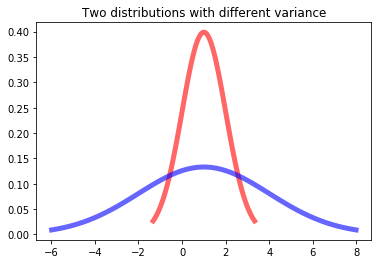

In [34]:
# Mess around with the variance to see how the shape is altered.

fig, ax = plt.subplots()

mean = 1
std = 1
z_curve = np.linspace(stats.norm(mean,std).ppf(0.01),
             stats.norm(mean,std).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean,std).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve')

mean = 1
std = 3
z_curve = np.linspace(stats.norm(mean,std).ppf(0.01),
             stats.norm(mean,std).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mean,std).pdf(z_curve),
     'b-', lw=5, alpha=0.6, label='norm pdf')

ax.set_title("Two distributions with different variance")

# Kurtosis

![kurtosis](images/kurtosis.png)


It is important to note that while standard deviation and kurtosis can be in communication with each other, they are not the same thing. 

As [Peter H. Westhall puts it:](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4321753/)
>The incorrect notion that kurtosis somehow measures “peakedness” (flatness, pointiness or modality) of a distribution is remarkably persistent, despite attempts by statisticians to set the record straight...Kurtosis tells you virtually nothing about the shape of the peak - its only unambiguous interpretation is in terms of tail extremity; i.e., either existing outliers (for the sample kurtosis) or propensity to produce outliers (for the kurtosis of a probability distribution).


## Skew 

Skew is a measure of assymemtry where a skew of zero is perfectly symetrical about the mean.   
![skew](images/skew.png)

In [38]:
# We can check skew with scipy
z_curve = np.random.normal(0,1, 1000)
print(stats.skew(z_curve))

0.01567802861096053


To add right skew to the data, let's add some outliers to the right of the mean.

To learn about skew, let's take a normal distribution, and add values to skew it.

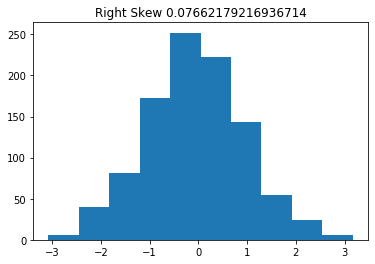

In [45]:
# Update add right skew with data to skew it.
z_curve = np.random.normal(0,1, 1000)
add_right_skew = [0]
right_skewed_data = np.concatenate([z_curve, add_right_skew])

fig, ax = plt.subplots()
ax.hist(right_skewed_data)
ax.set_title(f"Right Skew {stats.skew(right_skewed_data)}");

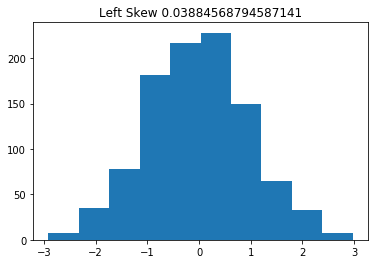

In [46]:
# Now, do the same for left skewed data

z_curve = np.random.normal(0,1, 1000)
add_left_skew = [0]
left_skewed_data = np.concatenate([z_curve, add_left_skew])

fig, ax = plt.subplots()
ax.hist(left_skewed_data)
ax.set_title(f"Left Skew {stats.skew(left_skewed_data)}");

# Pair Program

When we get to modeling, certain models may be improved by correcting the skew of our distributions to make them more normal.  below are a few different ways to correct for different types of skew.

### Transforming  Right/Positively Skewed Data

We may want to transform our skewed data to make it approach symmetry.

Common transformations of this data include 

#### Square root transformation:
Applied to positive values only. Hence, observe the values of column before applying.

`np.sqrt(array_like_object)`


#### The cube root transformation: 
involves converting x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data.

`np.cbrt(array_like_object)`

#### The logarithm:
x to log base 10 of x, or x to log base e of x (ln x), or x to log base 2 of x, is a strong transformation and can be used to reduce right skewness.

`np.log(array_like_object) `

## Left/Negatively Skewed Data

### Square transformation:
The square, x to x2, has a moderate effect on distribution shape and it could be used to reduce left skewness.
Another method of handling skewness is finding outliers and possibly removing them

`np.square(array_like_object)`

Let's return to the Divy ride times.

Let's return to our Divy ride time example.  

Below is the original distribution of ride times.


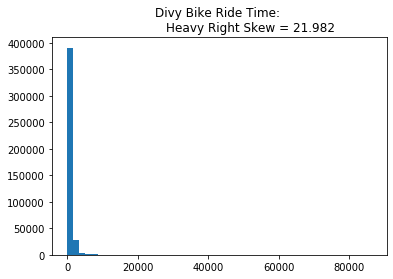

In [58]:
fig, ax = plt.subplots()

ax.hist(divy_trips.ride_time, bins=50);
ax.set_title("""Divy Bike Ride Time: 
                Heavy Right Skew = {}""".format(round(stats.skew(divy_trips.ride_time),3)));


With a partner, apply an appropriate transformation to reduce the skew of the distribution:
    
1. Select and apply an appropriate transformation
2. Plot transformed distribution
3. Report transformed skew
    - Hint: certain transformations don't like zeros
    

In [47]:
# your code here

## CDF: Cumulative Distribution Function

![](images/cdf.png)

The cumulative distribution function describes the probability that your result will be of a value equal to or below a certain value. It can apply to both discrete or continuous functions.

For the scenario above, the CDF would describe the probability of drawing a ball equal to or below a certain number.  

In order to create the CDF from a sample, we:
- align the values from least to greatest
- for each value, count the number of values that are less than or equal to the current value
- divide that count by the total number of values

The CDF of the Lotto example plots how likely we are to get a ball less than or equal to a given example. 

Let's create the CDF for our Lotto example


In [45]:
# align the values

# count the number of values that are less than or equal to the current value

# divide by total number of values


# Normal Distribution

The normal distribution describes many phenomena. Think of anything that has a typical range:
- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities
- IQ
- Heart rate

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

Similarly, there are large elephants and there are small elephants, but most elephants are near the average size.

The normal distribution is _very_ common in nature and will arise often in your work. Get to know it well!

You will recognize it by its characteristic bell curve. 

![normal_curve](images/IQ_normal.png)

You may see the notation 

$ N(μ,σ2)$

where N signifies that the distribution is normal, μ is the mean, and σ2 is the variance. 


The PDF of the normal curve equals:

$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]$


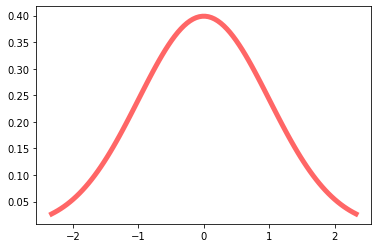

In [229]:

fig, ax = plt.subplots()

mu = 0
sigma = 1
z_curve = np.linspace(stats.norm(mu,sigma).ppf(0.01),
             stats.norm(mu,sigma).ppf(0.99), 100)
ax.plot(z_curve, stats.norm(mu,sigma).pdf(z_curve),
     'r-', lw=5, alpha=0.6, label='z_curve')

![](images/normal_2.png)

# Quick Solo Challenge

Turn off you cameras, turn them back on when you solved the problem, or when 1 minutes is up.

suppose the average height of an American woman is 65 inches with a standard deviation of 3.5 inches. 
Use numpy's [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to generate a sample of 1000 women and plot the histogram of the sample.


In [230]:
# Code here

# Standard Normal Distribution

A standard normal distribution has a mean of 0 and standard deviation of 1. This is also known as a z distribution. 


![norm_to_z](images/norm_to_z.png)

In [69]:
# Let's transform the normal distribtion centered on 5 with a standard deviation of 2 into a z curve

![](images/empirical_rule.png)

## Empirical Rule
> The empirical or 68–95–99.7 states that 68% of the values of a normal distribution of data lie within 1 standard deviation of the mean, 95% within 2 stds, and 99.7 within three.  
> The empirical rule has countless applications in data science, which we will see as we move into statistical testing and modeling. 

By calculating the z-score of an individual point, we can see how unlikely a value is.

Consider, once again, the distribution of heights of American women, with a mean of 65 inches and a standard deviation of 3.5 inches.

Calculate the zscore of a height of 75 inches. 

Based on the empirical rule, if you were sampling heights of American women, speculate as to how improbable would that height be?

In [76]:
# Your code here

**Empirical Rule Practice**

The lifespans of gorillas in a particular zoo are normally distributed. The average gorilla lives 16 years; the standard deviation is 1.7 years.

Use the empirical rule (68 - 95 - 99.7)to estimate the probability of a gorilla living longer than 14.3 years.

In [ ]:
# Your answer here

# Pair Program

Z score can be used to eliminate outliers.

Based on the empirical rule, if our data is normally distributed, we can remove outliers based on the zscore. 

In the example below, we will consider anything outside of 3 std's away from the mean an outlier.

Z score outlier removal wouldn't work on our original divy bike ride time dataset, because the original set was heavily right skewed.  However, our log transformed data set was approximately normal.  Let's remove outliers based on the log transformed data.

In order to do so, you need to:

    1. remove records with zero values for ride_time
    2. log transform the ride_times
    3. use stats.zscore to calculate the z-score for each logtransformed time
    4. Use np.absolute to subset the dataframe to include values above or below 3 standard deviations from the mean 
    5. Plot the boxplot of the ride times with time in seconds (i.e. do not plot the log-transformed distribution.  The boxplot, therefore, will still show outliers)

In [ ]:
# Remove zero values


In [ ]:
# log transform ride times

In [ ]:
# use stats.zscore to calculate the z-score for each logtransformed time


In [ ]:
# 4. Use np.absolute to subset the dataframe to include values above or below 3 standard deviations from the mean 

In [ ]:
# 5. Plot the boxplot of the ride times with time in seconds (i.e. do not plot the log-transformed distribution.  The boxplot, therefore, will still show outliers)
    